In [1]:
from selenium import webdriver
import time

In [135]:
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains

In [603]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import re
import string

from wordcloud import WordCloud

import nltk

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download("punkt")

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer,TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

stop_words = stopwords.words('english')
lem = WordNetLemmatizer()

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /Users/aydin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/aydin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/aydin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [331]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager



[WDM] - Current google-chrome version is 87.0.4280
[WDM] - Get LATEST driver version for 87.0.4280
[WDM] - Driver [/Users/aydin/.wdm/drivers/chromedriver/mac64/87.0.4280.88/chromedriver] found in cache


In [392]:
driver = webdriver.Chrome(ChromeDriverManager().install())
#driver = webdriver.Firefox()

[WDM] - Current google-chrome version is 87.0.4280
[WDM] - Get LATEST driver version for 87.0.4280


[WDM] - Driver [/Users/aydin/.wdm/drivers/chromedriver/mac64/87.0.4280.88/chromedriver] found in cache


In [332]:
driver.implicitly_wait(10)

In [43]:
#cdu_text =[]
#cdu_title= []
#cdu_date = []
for i in range(1,47):
    if i != 0:
        path = "https://www.cdu.de/search/site?page="+str(i)+"&solrsort=ds_created%20desc&f%5B1%5D=im_field_article_format%3A363"
        driver.get(path)
    else:
        path = "https://www.cdu.de/search/site?page=&solrsort=ds_created%20desc&f%5B1%5D=im_field_article_format%3A363"
        driver.get(path)        
    for j in range(1,11):
        try:
            path_date = "/html/body/div[2]/div/div[2]/div/section/article["+str(j)+"]/p/span"
            text = WebDriverWait(driver, 30).until(
            EC.presence_of_element_located((By.XPATH, path_date))
            )
            c = text.text
            cdu_date.append(c)
            path_title= "/html/body/div[2]/div/div[2]/div/section/article["+str(j)+"]/h3"
            text = WebDriverWait(driver, 30).until(
            EC.presence_of_element_located((By.XPATH, path_title))
            )
            c = text.text
            cdu_title.append(c)
            path_link = "/html/body/div[2]/div/div[2]/div/section/article["+str(j)+"]/h3/a[1]"
            element = WebDriverWait(driver, 30).until(
            EC.presence_of_element_located((By.XPATH, path_link))
            )
            element.click()
            text = WebDriverWait(driver, 30).until(
            EC.presence_of_element_located((By.CLASS_NAME, 'text'))
            )
            c = text.text
            cdu_text.append(c)
            driver.back()
            time.sleep(5)
        except:
            driver.back()
            time.sleep(5)
        print(i,j)
    

16 1
16 2
16 3
16 4
16 5
16 6
16 7
16 8
16 9
16 10
17 1
17 2
17 3
17 4
17 5
17 6
17 7
17 8
17 9
17 10
18 1
18 2
18 3
18 4
18 5
18 6
18 7
18 8
18 9
18 10
19 1
19 2
19 3
19 4
19 5
19 6
19 7
19 8
19 9
19 10
20 1
20 2
20 3
20 4
20 5
20 6
20 7
20 8
20 9
20 10
21 1
21 2
21 3
21 4
21 5
21 6
21 7
21 8
21 9
21 10
22 1
22 2
22 3
22 4
22 5
22 6
22 7
22 8
22 9
22 10
23 1
23 2
23 3
23 4
23 5
23 6
23 7
23 8
23 9
23 10
24 1
24 2
24 3
24 4
24 5
24 6
24 7
24 8
24 9
24 10
25 1
25 2
25 3
25 4
25 5
25 6
25 7
25 8
25 9
25 10
26 1
26 2
26 3
26 4
26 5
26 6
26 7
26 8
26 9
26 10
27 1
27 2
27 3
27 4
27 5
27 6
27 7
27 8
27 9
27 10
28 1
28 2
28 3
28 4
28 5
28 6
28 7
28 8
28 9
28 10
29 1
29 2
29 3
29 4
29 5
29 6
29 7
29 8
29 9
29 10
30 1
30 2
30 3
30 4
30 5
30 6
30 7
30 8
30 9
30 10
31 1
31 2
31 3
31 4
31 5
31 6
31 7
31 8
31 9
31 10
32 1
32 2
32 3
32 4
32 5
32 6
32 7
32 8
32 9
32 10
33 1
33 2
33 3
33 4
33 5
33 6
33 7
33 8
33 9
33 10
34 1
34 2
34 3
34 4
34 5
34 6
34 7
34 8
34 9
34 10
35 1
35 2
35 3
35 4
35 5
35 6
3

In [380]:
#since there was a problem to extract texts for green party, the text at the genereal page was taken
cdu__sort_text = []
for i in range(0,47):
    if i != 0:
        path = "https://www.cdu.de/search/site?page="+str(i)+"&solrsort=ds_created%20desc&f%5B1%5D=im_field_article_format%3A363"
        driver.get(path)
    else:
        path = "https://www.cdu.de/search/site?page=&solrsort=ds_created%20desc&f%5B1%5D=im_field_article_format%3A363"
        driver.get(path)        
    for j in range(1,11):
        path_link = "/html/body/div[2]/div/div[2]/div/section/article["+str(j)+"]/p"
        element = WebDriverWait(driver, 30).until(
        EC.presence_of_element_located((By.XPATH, path_link))
            )
        c = element.text
        c = c[11:]
        cdu__sort_text.append(c)    
        print(i,j)
    

0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
4 10
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
5 10
6 1
6 2
6 3
6 4
6 5
6 6
6 7
6 8
6 9
6 10
7 1
7 2
7 3
7 4
7 5
7 6
7 7
7 8
7 9
7 10
8 1
8 2
8 3
8 4
8 5
8 6
8 7
8 8
8 9
8 10
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
9 9
9 10
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
10 10
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
13 1
13 2
13 3
13 4
13 5
13 6
13 7
13 8
13 9
13 10
14 1
14 2
14 3
14 4
14 5
14 6
14 7
14 8
14 9
14 10
15 1
15 2
15 3
15 4
15 5
15 6
15 7
15 8
15 9
15 10
16 1
16 2
16 3
16 4
16 5
16 6
16 7
16 8
16 9
16 10
17 1
17 2
17 3
17 4
17 5
17 6
17 7
17 8
17 9
17 10
18 1
18 2
18 3
18 4
18 5
18 6
18 7
18 8
18 9
18 10
19 1
19 2
19 3
19 4
19 5
19 6
19 7
19 8
19 9
19 10
20 1
20 2
20 3
20 4
20 5
20 6
20 7
20 8
20 9
20 10
21 1
21 2
21 3
21 4
21 5
21 6

In [382]:
cdu__sort_text[len(cdu__sort_text)-1]

'Pressemitteilung Bei seinem Besuch der Internationalen Grünen Woche hat CDU-Generalsekretär Hermann Gröhe die Bedeutung des ländlichen Raumes hervorgehoben: „Ländliche Räume prägen unser Land in ganz besonderer Weise“, so Gröhe, „und angesichts der demogr ...'

In [109]:
driver.get('https://www.spd.de/presse/pressemitteilungen/')

In [403]:
#getting datat for spd from website
spd_text =[]
spd_title= []
spd_date = []
driver.get('https://www.spd.de/presse/pressemitteilungen/')
for i in range(1,50):
    if i != 1:
        #the only way to go next page
        element = WebDriverWait(driver, 30).until(
        EC.presence_of_element_located((By.LINK_TEXT,'Nächste Seite'))
        )
        element.click()       
    for j in range(1,11):
        try:
            path_text = "//*[@id='main']/div[2]/section/div/article["+str(j)+"]/div[2]"
            text = WebDriverWait(driver, 30).until(
            EC.presence_of_element_located((By.XPATH, path_text))
            )
            c = text.text
            spd_text.append(c)
            path_date = "//*[@id='main']/div[2]/section/div/article["+str(j)+"]/div[1]/div/div/div[2]/div"
            text = WebDriverWait(driver, 30).until(
            EC.presence_of_element_located((By.XPATH, path_date))
            )
            c = text.text
            spd_date.append(c)
            path_title= "//*[@id='main']/div[2]/section/div/article["+str(j)+"]/div[1]"
            text = WebDriverWait(driver, 30).until(
            EC.presence_of_element_located((By.XPATH, path_title))
            )
            c = text.text
            spd_title.append(c)
            bre
        except:
            pass
        print(i,j)

     

1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
4 10
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
5 10
6 1
6 2
6 3
6 4
6 5
6 6
6 7
6 8
6 9
6 10
7 1
7 2
7 3
7 4
7 5
7 6
7 7
7 8
7 9
7 10
8 1
8 2
8 3
8 4
8 5
8 6
8 7
8 8
8 9
8 10
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
9 9
9 10
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
10 10
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
13 1
13 2
13 3
13 4
13 5
13 6
13 7
13 8
13 9
13 10
14 1
14 2
14 3
14 4
14 5
14 6
14 7
14 8
14 9
14 10
15 1
15 2
15 3
15 4
15 5
15 6
15 7
15 8
15 9
15 10
16 1
16 2
16 3
16 4
16 5
16 6
16 7
16 8
16 9
16 10
17 1
17 2
17 3
17 4
17 5
17 6
17 7
17 8
17 9
17 10
18 1
18 2
18 3
18 4
18 5
18 6
18 7
18 8
18 9
18 10
19 1
19 2
19 3
19 4
19 5
19 6
19 7
19 8
19 9
19 10
20 1
20 2
20 3
20 4
20 5
20 6
20 7
20 8
20 9
20 10
21 1
21 2
21 3
21 4
21 5
21 6
21 7
21 8
21 9
21 10
22 1
22 2
22 3
22 4

In [336]:
driver.get('https://www.gruene-bundestag.de/presse/pressemitteilungen')

In [955]:
# we had problem navigate to website with green party, that's why we make upload pages manually, and then we got the date

In [338]:
text = WebDriverWait(driver, 30).until(
        EC.presence_of_all_elements_located((By.XPATH, '//*[@id="c5882"]/div/div[3]/div/div/article/a/div/div[2]' ))
        )

In [341]:
grn_text = []
for i in text:
    grn_text.append(i.text)


In [348]:
grn_text[1]

'Die deutsche Wirtschaft ist von der Corona-Krise hart getroffen worden. Darüber kann auch die positive wirtschaftliche Entwicklung im Sommer vergangenen Jahres im Anschluss an den ersten Lockdown nicht hinwegtäuschen.'

In [352]:
title = WebDriverWait(driver, 30).until(
        EC.presence_of_all_elements_located((By.XPATH, '//*[@id="c5882"]/div/div[3]/div/div/article/a/div/div[1]/div[1]/h3' ))
        )

In [353]:
grn_title = []
for i in title:
    grn_title.append(i.text)

In [354]:
grn_title[1]

'Wirtschaftsprognose 2021/Corona-Hilfen'

In [355]:
date = WebDriverWait(driver, 30).until(
        EC.presence_of_all_elements_located((By.XPATH, '//*[@id="c5882"]/div/div[3]/div/div/article/a/div/div[1]/div[2]/span' ))
        )

In [356]:
grn_date = []
for i in date:
    grn_date.append(i.text)

In [417]:
#due to have limited data for die linke,we did something at the beginning manually
path_title = '//*[@id="c654"]/div/div/div/div/div/div[1]/h2/a'
title = WebDriverWait(driver, 30).until(
        EC.presence_of_all_elements_located((By.XPATH, path_title ))
        )

In [418]:
link_title = []
for i in title:
    link_title.append(i.text)

In [420]:
print(len(link_title))
print(link_title[0])

50
Freude ja, jubeln nein


In [421]:
path_text = '//*[@id="c654"]/div/div/div/div/div/div[2]/p'
text = WebDriverWait(driver, 30).until(
        EC.presence_of_all_elements_located((By.XPATH, path_text ))
        )

In [424]:
link_text = []
for i in text:
    link_text.append(i.text)

In [425]:
print(len(link_text))
print(link_text[0])

50
„Es ist für uns alle gut, wenn der Ökolandbau vorankommt. Wenn auch die Nachfrage nach Biolebensmitteln steigt - umso mehr. Aber das darf nicht darüber hinwegtäuschen, dass dies allein weder die soziale noch ökologische oder Klimakrise lösen wird. Weiter im Blick bleiben muss, dass sich soziale Probleme infolge der Marktübermacht des Lebensmitteleinzelhandels zuspitzen und auch Ökobetriebe zunehmend unter Preisdruck geraten. Auch die Ökobetriebe haben Probleme mit der Bodenspekulation“, kommentiert Kirsten Tackmann, agrarpolitische Sprecherin der Fraktion DIE LINKE, die heute von Bundesministerin Julia Klöckner vorgelegten Ergebnisse des ‚Öko-Barometer 2020‘.


In [426]:
path_date = '//*[@id="c654"]/div/div/div/div/div/div[2]/time'
date = WebDriverWait(driver, 30).until(
        EC.presence_of_all_elements_located((By.XPATH, path_date))
        )

In [431]:
link_date = []
for i in date:
    link_date.append(i.text[:len(i.text)-2])

In [432]:
print(len(link_date))
print(link_date[20])

50
04.01.21


In [439]:
die_linke = pd.DataFrame(zip(link_date,link_text, link_title, ('Die Linke  '*len(link_date)).split("  ")), columns=['date','text','title','label'])

In [446]:
spd_df = spd_date
spd_df['title'] = spd_title
spd_df['text'] = spd_text
spd_df['label'] =  ('SPD '*len(spd_date)).split()
spd_df

,date,title,text,label
0,14.01.2021,001/21\n14.01.2021\nEinladung zur Pressekonfer...,Die SPD-Vorsitzenden Saskia Esken und Norbert ...,SPD
1,26.12.2020,"125/2020\n26.12.2020\nUdo Bullmann, SPD-Europa...",,SPD
2,22.12.2020,pm 124\n22.12.2020\nSPD zieht positive Bilanz ...,Zum Ende der deutschen EU-Ratspräsidentschaft ...,SPD
3,18.12.2020,123/20\n18.12.2020\nPrivatisierungsdiskussion ...,Für die Medien- und Netzpolitische Kommission ...,SPD
4,11.12.2020,"122/20\n11.12.2020\nUdo Bullmann, SPD-Europabe...","""Die Blockade des EU-Haushalts durch Polen und...",SPD
...,...,...,...,...
485,13.10.2020,100/20\n13.10.2020\n125. Geburtstag von Kurt S...,Die SPD-Vorsitzenden Saskia Esken und Norbert ...,SPD
486,02.10.2020,099/20\n02.10.2020\nUdo Bullmann zum Abschluss...,Anlässlich des Abschlusses des EU-Sondergipfel...,SPD
487,02.10.2020,098/20\n02.10.2020\nEinladung zur Pressekonfer...,Im Anschluss an die Sitzung des SPD-Parteivors...,SPD
488,01.10.2020,097/20\n01.10.2020\nAG 60 plus – Aufruf zum in...,Zum internationalen Tag der älteren Menschen e...,SPD


In [448]:
cdu_df = cdu_date
cdu_df['title'] = cdu_title
cdu_df['text'] = cdu__sort_text
cdu_df['label'] =  ('CDU '*len(cdu_date)).split()
cdu_df

,date,title,text,label
0,06.11.2019,Paul Ziemiak: Die AfD ist die Anti-Deutschland...,Pressemitteilung Am 1. September 2018 marschie...,CDU
1,01.11.2019,Paul Ziemiak im Interview mit dem Westfalen-Bl...,"Pressemitteilung Herr Ziemiak, halten Sie die ...",CDU
2,31.10.2019,Wir müssen unser Land verteidigen,"Pressemitteilung Paul Ziemiak, Generalsekretär...",CDU
3,01.10.2019,Kramp-Karrenbauer: Mut der Ostdeutschen hat De...,Pressemitteilung Anlässlich des Tages der Deut...,CDU
4,19.07.2019,Zur gestrigen Sitzung des Klimakabinetts,Pressemitteilung Anlässlich der gestrigen Sitz...,CDU
...,...,...,...,...
465,01.02.2012,CDU gründet „Plattform Energiewende“,Pressemitteilung Der Stellvertretende Vorsitze...,CDU
466,28.01.2012,CDU unterstützt UMP im Wahlkampf,Pressemitteilung Im Rahmen seines Besuchs beim...,CDU
467,26.01.2012,Holocaust-Gedenktag ist Mahnung und Auftrag,Pressemitteilung Anlässlich des Holocaust-Gede...,CDU
468,26.01.2012,Interview von Hermann Gröhe im Hamburger Abend...,Pressemitteilung Führende Vertreter der Linken...,CDU


In [458]:
grn_df = grn_date
grn_df['title'] = grn_title
grn_df['text'] = grn_text
grn_df['label'] =  ('Grünen '*len(grn_date)).split()
grn_df.dropna(inplace=True)
grn_df

,date,title,text,label
0,15.01.2021,20 Jahre Bio-Siegel,Vor 20 Jahren wurde das deutsche Bio-Siegel ei...,Grünen
1,14.01.2021,Wirtschaftsprognose 2021/Corona-Hilfen,Die deutsche Wirtschaft ist von der Corona-Kri...,Grünen
2,13.01.2021,Appell mehrerer Ökonominnen und Ökonomen nach ...,Der Aufruf der Ökonominnen und Ökonomen sollte...,Grünen
3,13.01.2021,Gesundheitsbelastung des Pflegepersonals,Die Corona-Pandemie ist eine globale Gesundhei...,Grünen
4,13.01.2021,Zukunft der Innenstädte,"Die Anhörung hat noch einmal verdeutlicht, das...",Grünen
...,...,...,...,...
586,29.04.2020,Ausgangssperren in Wohneinrichtungen für behin...,Die Bundesregierung muss nun schnell eine einh...,Grünen
587,29.04.2020,Die Arbeitswelt muss fairer werden,Weltweit missbrauchen Regime die derzeitige Co...,Grünen
588,29.04.2020,Sommerurlaub in Deutschland,In der Corona-Pandemie übernimmt die Wissensch...,Grünen
589,29.04.2020,Aufkündigung des Libyen-Abkommens von 2015 dur...,Migrationspolitik ist mehr als Grenzkontrollen...,Grünen


In [460]:
#concaniting the frameworks
frame = [cdu_df,spd_df,grn_df, die_linke]
df = pd.concat(frame)
df

,date,title,text,label
0,06.11.2019,Paul Ziemiak: Die AfD ist die Anti-Deutschland...,Pressemitteilung Am 1. September 2018 marschie...,CDU
1,01.11.2019,Paul Ziemiak im Interview mit dem Westfalen-Bl...,"Pressemitteilung Herr Ziemiak, halten Sie die ...",CDU
2,31.10.2019,Wir müssen unser Land verteidigen,"Pressemitteilung Paul Ziemiak, Generalsekretär...",CDU
3,01.10.2019,Kramp-Karrenbauer: Mut der Ostdeutschen hat De...,Pressemitteilung Anlässlich des Tages der Deut...,CDU
4,19.07.2019,Zur gestrigen Sitzung des Klimakabinetts,Pressemitteilung Anlässlich der gestrigen Sitz...,CDU
...,...,...,...,...
45,10.12.20,Bankrotterklärung der Europäischen Union,„Die beim EU-Gipfel geplanten Maßnahmen gegen ...,Die Linke
46,10.12.20,Konzernfreundliche Agrarpolitik beenden,„Die wirtschaftliche Situation in vielen Landw...,Die Linke
47,10.12.20,Verschwörungsideologen lassen sich nicht gehei...,"„Schon lange warne ich davor, dass sich ein Te...",Die Linke
48,09.12.20,Besetzung vom Danni ist Riesenerfolg für Klima...,„Die Besetzung des Dannenröder Waldes wird als...,Die Linke


In [478]:
import seaborn as sns
import matplotlib.pyplot as plt

/Users/aydin/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/aydin/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/aydin/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

Text(0.5, 1.0, 'Die Linke Text Lengths Histogram')

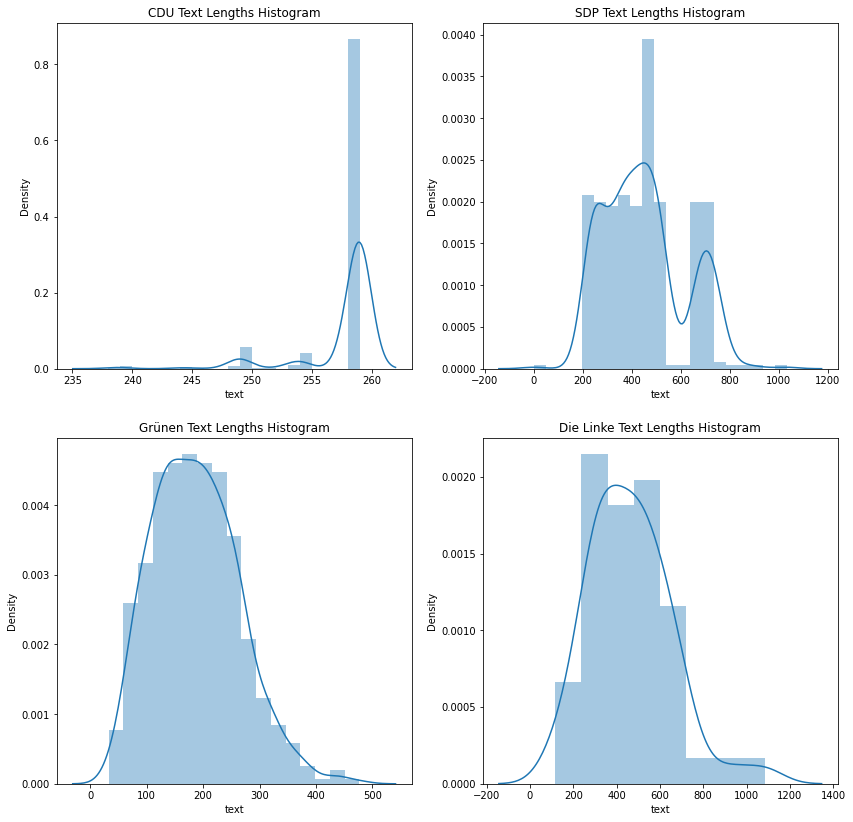

In [485]:
fig, ax = plt.subplots(2,2, figsize=(14,14))
sns.distplot(cdu_df.text.apply(lambda x : len(x)),ax=ax[0,0])
sns.distplot(spd_df.text.apply(lambda x : len(x)),ax=ax[0,1])
sns.distplot(grn_df.text.apply(lambda x : len(x)),ax=ax[1,0])
sns.distplot(die_linke.text.apply(lambda x : len(x)),ax=ax[1,1])
ax[0,0].set_title('CDU Text Lengths Histogram')
ax[0,1].set_title('SDP Text Lengths Histogram')
ax[1,0].set_title('Grünen Text Lengths Histogram')
ax[1,1].set_title('Die Linke Text Lengths Histogram')

/Users/aydin/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/aydin/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/aydin/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

Text(0.5, 1.0, 'Die Linke Title Lengths Histogram')

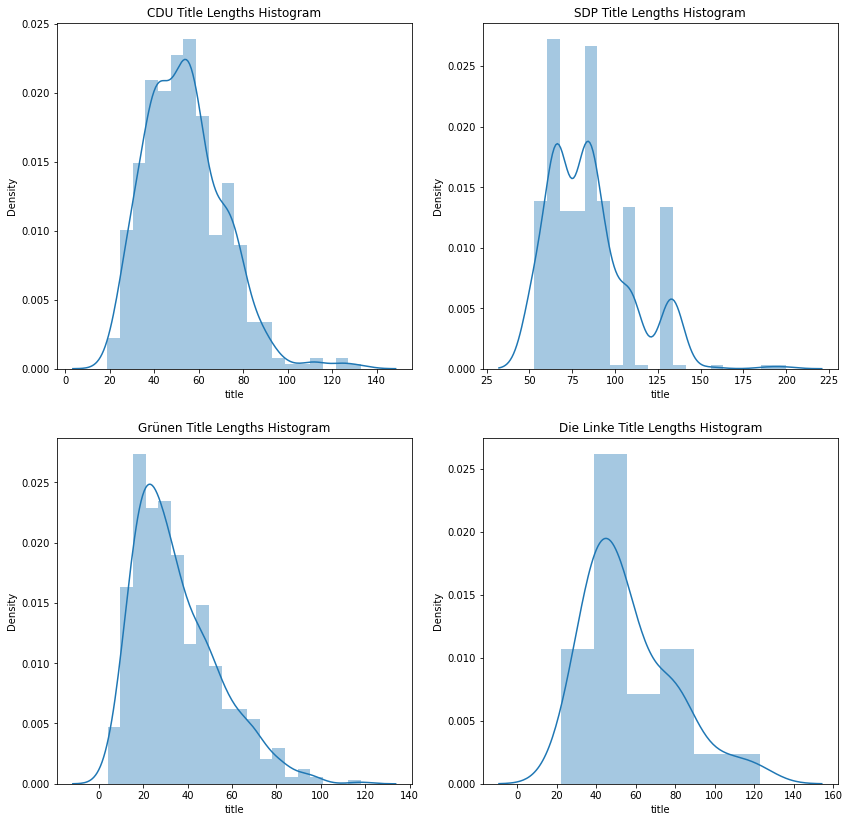

In [486]:
fig, ax = plt.subplots(2,2, figsize=(14,14))
sns.distplot(cdu_df.title.apply(lambda x : len(x)),ax=ax[0,0])
sns.distplot(spd_df.title.apply(lambda x : len(x)),ax=ax[0,1])
sns.distplot(grn_df.title.apply(lambda x : len(x)),ax=ax[1,0])
sns.distplot(die_linke.title.apply(lambda x : len(x)),ax=ax[1,1])
ax[0,0].set_title('CDU Title Lengths Histogram')
ax[0,1].set_title('SDP Title Lengths Histogram')
ax[1,0].set_title('Grünen Title Lengths Histogram')
ax[1,1].set_title('Die Linke Title Lengths Histogram')

In [525]:
cdu_df['year']=cdu_df.date.apply(lambda x : x[-4:])
cdu_df['month'] = cdu_df.date.apply(lambda x : x[3:5])
spd_df['year']=spd_df.date.apply(lambda x : x[-4:])
spd_df['month'] = spd_df.date.apply(lambda x : x[3:5])

In [531]:
spd_df.month.value_counts()

10    329
11    100
09     47
12     13
01      1
Name: month, dtype: int64

/Users/aydin/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/aydin/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/aydin/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarnin

Text(0.5, 1.0, 'SPD Number of Press Realase over Months')

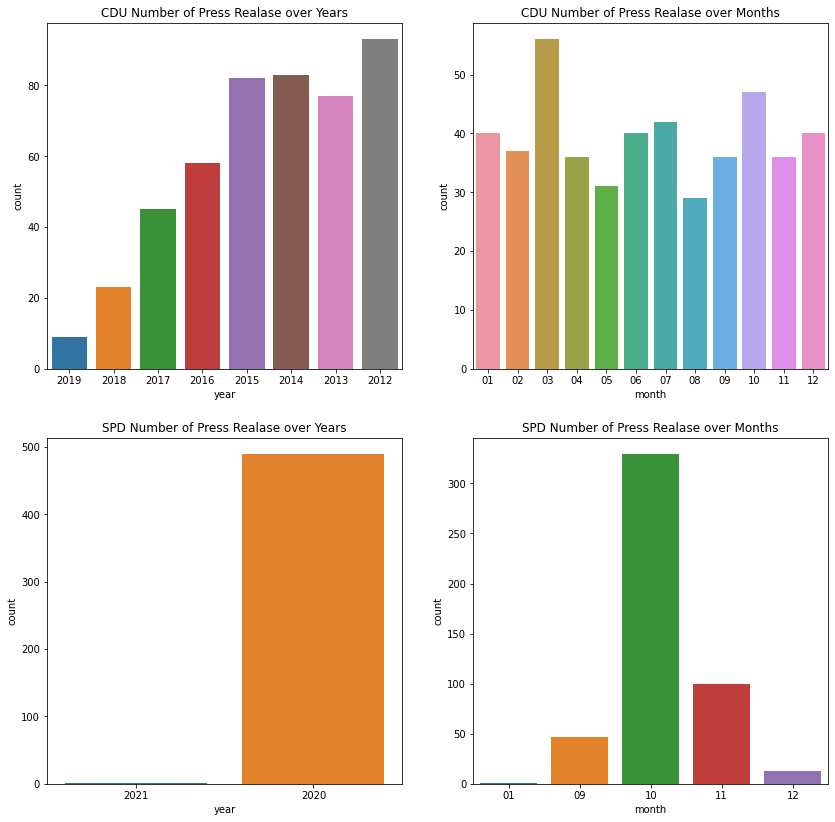

In [532]:
fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(14,14))
sns.countplot(cdu_df.year, ax=ax[0,0])
sns.countplot(cdu_df.month.sort_values(), ax=ax[0,1],)
sns.countplot(spd_df.year, ax=ax[1,0])
sns.countplot(spd_df.month.sort_values(), ax=ax[1,1],)
ax[0,0].set_title('CDU Number of Press Realase over Years')
ax[0,1].set_title('CDU Number of Press Realase over Months')
ax[1,0].set_title('SPD Number of Press Realase over Years')
ax[1,1].set_title('SPD Number of Press Realase over Months')

In [537]:
die_linke['year']=die_linke.date.apply(lambda x: x[-2:])
die_linke['month'] = die_linke.date.apply(lambda x: x[3:5])
grn_df['year']=grn_df.date.apply(lambda x : x[-4:])
grn_df['month'] = grn_df.date.apply(lambda x : x[3:5])

/Users/aydin/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/aydin/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/aydin/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarnin

Text(0.5, 1.0, 'Die Linke Number of Press Realase over Months')

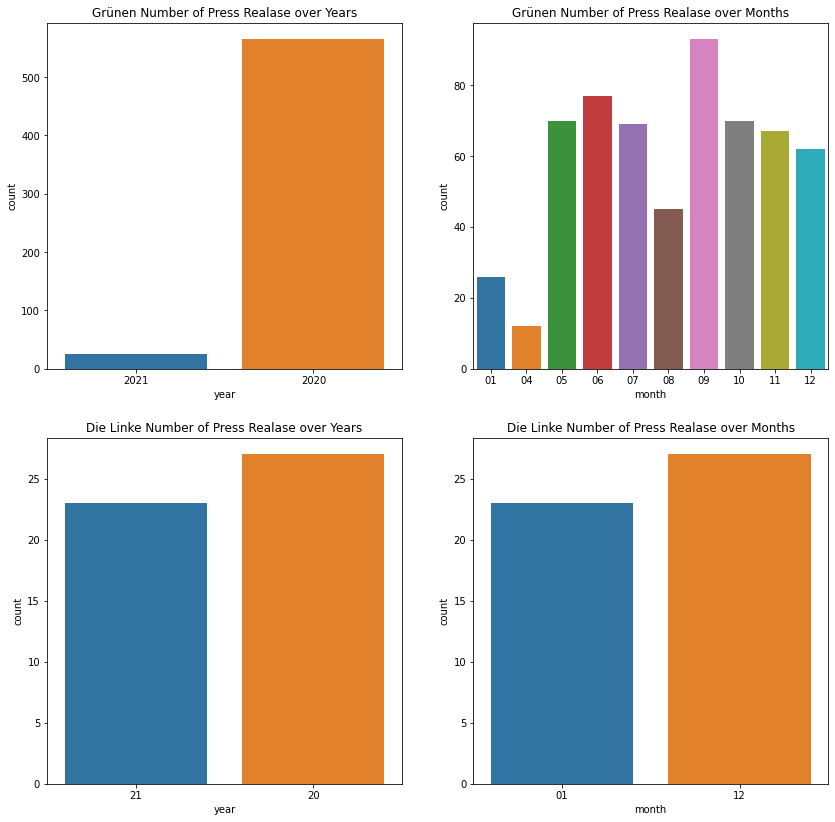

In [542]:
fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(14,14))
sns.countplot(grn_df.year, ax=ax[0,0])
sns.countplot(grn_df.month.sort_values(), ax=ax[0,1],)
sns.countplot(die_linke.year, ax=ax[1,0])
sns.countplot(die_linke.month.sort_values(), ax=ax[1,1])
ax[0,0].set_title('Grünen Number of Press Realase over Years')
ax[0,1].set_title('Grünen Number of Press Realase over Months')
ax[1,0].set_title('Die Linke Number of Press Realase over Years')
ax[1,1].set_title('Die Linke Number of Press Realase over Months')

<AxesSubplot:xlabel='label', ylabel='count'>

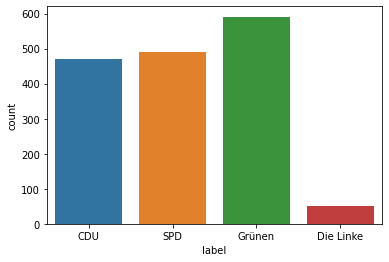

In [543]:
sns.countplot(x='label',data=df)

In [ ]:
#since the amount for die linke is very small, it was dropped
df = df[df['label']!='Die Linke']

In [464]:
lem = WordNetLemmatizer()

In [734]:
stop_words =stopwords.words('german')


In [735]:
stop_words

['aber',
 'alle',
 'allem',
 'allen',
 'aller',
 'alles',
 'als',
 'also',
 'am',
 'an',
 'ander',
 'andere',
 'anderem',
 'anderen',
 'anderer',
 'anderes',
 'anderm',
 'andern',
 'anderr',
 'anders',
 'auch',
 'auf',
 'aus',
 'bei',
 'bin',
 'bis',
 'bist',
 'da',
 'damit',
 'dann',
 'der',
 'den',
 'des',
 'dem',
 'die',
 'das',
 'dass',
 'daß',
 'derselbe',
 'derselben',
 'denselben',
 'desselben',
 'demselben',
 'dieselbe',
 'dieselben',
 'dasselbe',
 'dazu',
 'dein',
 'deine',
 'deinem',
 'deinen',
 'deiner',
 'deines',
 'denn',
 'derer',
 'dessen',
 'dich',
 'dir',
 'du',
 'dies',
 'diese',
 'diesem',
 'diesen',
 'dieser',
 'dieses',
 'doch',
 'dort',
 'durch',
 'ein',
 'eine',
 'einem',
 'einen',
 'einer',
 'eines',
 'einig',
 'einige',
 'einigem',
 'einigen',
 'einiger',
 'einiges',
 'einmal',
 'er',
 'ihn',
 'ihm',
 'es',
 'etwas',
 'euer',
 'eure',
 'eurem',
 'euren',
 'eurer',
 'eures',
 'für',
 'gegen',
 'gewesen',
 'hab',
 'habe',
 'haben',
 'hat',
 'hatte',
 'hatten',
 '

In [736]:
df['text2'] = df.text.apply(lambda x: x.lower())

In [793]:
def cleaning(data):
    
    #1. Tokenize
    text_tokens = word_tokenize(data)
    
    #2. Remove Puncs
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #3. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t.lower() not in stop_words]
    
    #4. lemma
    text_cleaned = [lem.lemmatize(t) for t in tokens_without_sw]
    
    #joining
    return " ".join(text_cleaned)

In [797]:
df['text2']=df.text.apply(cleaning)

In [798]:
df.text2

0      Pressemitteilung September marschierte Thüring...
1      Pressemitteilung Herr Ziemiak halten Linke Thü...
2      Pressemitteilung Paul Ziemiak Generalsekretär ...
3      Pressemitteilung Anlässlich Tages Deutschen Ei...
4      Pressemitteilung Anlässlich gestrigen Sitzung ...
                             ...                        
586    Bundesregierung schnell einheitliche europäisc...
587    Weltweit missbrauchen Regime derzeitige Freibr...
588    übernimmt Wissenschaft weltweit Verantwortung ...
589    Migrationspolitik mehr Grenzkontrollen Rückkeh...
590    Herausforderungen Klimakrise Artensterben gesc...
Name: text2, Length: 1551, dtype: object

In [799]:
#since there are several common words, which may  mislead out model, they are dropped. 
def common(data):
    data = data.split()
    ret = []
    for i in data:
        if i.lower() not in ['cdu','pressemitteilung' ,'pressestelle', 'spd','pressekonferenz','linke','grünen', 'erklärt']:
              ret.append(i)
    return " ".join(ret)
df['text2'].apply(common)

0      September marschierte Thüringer AfD Chef Björn...
1      Herr Ziemiak halten Thüringen Ministerpräsiden...
2      Paul Ziemiak Generalsekretär Deutschlands Mitg...
3      Anlässlich Tages Deutschen Einheit Oktober Vor...
4      Anlässlich gestrigen Sitzung Klimakabinetts Vo...
                             ...                        
586    Bundesregierung schnell einheitliche europäisc...
587    Weltweit missbrauchen Regime derzeitige Freibr...
588    übernimmt Wissenschaft weltweit Verantwortung ...
589    Migrationspolitik mehr Grenzkontrollen Rückkeh...
590    Herausforderungen Klimakrise Artensterben gesc...
Name: text2, Length: 1551, dtype: object

In [800]:
df['text2']=df['text2'].apply(common)

In [801]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [802]:
X_train=df["text2"]

In [803]:
vectorizer = CountVectorizer()

In [804]:
vectorizer.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [805]:
len(vectorizer.get_feature_names())

6230

In [806]:
X_train_count = vectorizer.transform(X_train)

In [807]:
a=pd.DataFrame(X_train_count.toarray(), columns=vectorizer.get_feature_names())

In [808]:
a.sum().sort_values(ascending=False).head(40)

deutschlands           456
tauber                 237
generalsekretär        214
peter                  214
menschen               204
müssen                 175
tod                    159
heute                  158
frauen                 156
teilt                  149
fragen                 147
arbeitsgemeinschaft    146
sicherheit             145
wandel                 143
tag                    141
gröhe                  137
welt                   134
europäischen           131
gibt                   118
union                  117
interview              116
deutschland            114
oktober                108
norbert                106
hermann                106
besonders              104
macht                  104
wurde                  104
thomas                 103
vorsitzender           103
vielen                 103
frage                  102
solidarität            102
gab                     97
esken                   97
saskia                  97
oppermann               96
v

In [809]:
tf_idf_vectorizer=TfidfVectorizer()

In [810]:
tf_idf_vectorizer.fit(X_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [811]:
X_train_tf_idf = tf_idf_vectorizer.transform(X_train)

In [812]:
b = pd.DataFrame(X_train_tf_idf.toarray(), columns=tf_idf_vectorizer.get_feature_names())

In [813]:
b.sum().sort_values(ascending=False).head(50)

deutschlands           49.171653
tauber                 30.618287
generalsekretär        29.788096
peter                  27.443544
menschen               26.168506
frauen                 23.437088
arbeitsgemeinschaft    22.820850
tod                    22.597885
müssen                 22.597469
teilt                  22.295639
europäischen           22.126767
vorstoß                21.279332
fragen                 20.628917
oktober                20.576781
union                  20.460029
heute                  20.282621
gröhe                  20.135772
tag                    19.551814
sicherheit             19.311769
wandel                 19.115029
gibt                   18.753535
schumacher             18.714213
kurt                   18.714213
besonders              18.454598
interview              17.212797
welt                   16.898475
wurde                  16.686442
thomas                 16.368209
hermann                15.937382
deutschland            15.915419
vorsitzend

### anaylzes for short textes

In [814]:
X = df['text2']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [815]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [816]:
X_train_count = vectorizer.transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [817]:
model = LogisticRegression()
model.fit(X_train_count, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [818]:
y_pred = model.predict(X_test_count)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[ 88   7   0]
 [  1 113   0]
 [  0   4  98]]
              precision    recall  f1-score   support

         CDU       0.99      0.93      0.96        95
      Grünen       0.91      0.99      0.95       114
         SPD       1.00      0.96      0.98       102

    accuracy                           0.96       311
   macro avg       0.97      0.96      0.96       311
weighted avg       0.96      0.96      0.96       311



### anaylzes for short titles

In [819]:
df['title2']=df.title2.apply(cleaning)

In [820]:
df['title2']=df['title2'].apply(common)

In [821]:
X = df['title2']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [822]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [823]:
X_train_count = vectorizer.transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [824]:
model_title = LogisticRegression()
model_title.fit(X_train_count, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [825]:
y_pred = model_title.predict(X_test_count)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[ 90   5   0]
 [  0 114   0]
 [  0   4  98]]
              precision    recall  f1-score   support

         CDU       1.00      0.95      0.97        95
      Grünen       0.93      1.00      0.96       114
         SPD       1.00      0.96      0.98       102

    accuracy                           0.97       311
   macro avg       0.98      0.97      0.97       311
weighted avg       0.97      0.97      0.97       311



### anaylzes for short sentences

In [826]:
#getting all sentences as list
sent_list=[]
for i in cdu__sort_text:
    a = i.split('.')
    for j in a:
        sent_list.append(j)

#making label list for sentences
label_c = ('cdu '*len(sent_list)).split()
#making dataframe by using zips
cdu_sent = pd.DataFrame(zip(sent_list, label_c),columns=['sentece','label'])

In [827]:
sent_list=[]
for i in spd_short_text.text:
    a = i.split('.')
    for j in a:
        sent_list.append(j)

label_s = ('spd '*len(sent_list)).split()
spd_sent = pd.DataFrame(zip(sent_list, label_s),columns=['sentece','label'])

In [828]:
sent_list=[]
for i in grn_text:
    a = i.split('.')
    for j in a:
        sent_list.append(j)

label_g = ('grn '*len(sent_list)).split()
grn_sent = pd.DataFrame(zip(sent_list, label_g),columns=['sentece','label'])

In [829]:
frame = [cdu_sent, spd_sent, grn_sent]
df_s = pd.concat(frame)
df_s.sample(20)

,sentece,label
1220,Der Nachtragshaushalt der Bundesregierung wirk...,grn
2053,,cdu
212,"Peter Tauber im Interview: ""Unsere Ziele: be...",cdu
2641,Pressemitteilung Zur Zustimmung des Bundeskabi...,cdu
2666,,cdu
385,,cdu
2040,Die Fragen stellte Robert Rossmann,cdu
1058,In ihrem neuesten Papier „Sicherheit im Wande...,spd
1314,,cdu
1026,Zum Tod von Thomas Oppermann erklären die SPD-...,spd


In [830]:
#dropping "" values from the dateframe
df_s.drop(list(df_s[df_s.sentece==""].index), inplace=True)

In [831]:
df_s.sample(20)

,sentece,label
100,Zum Mord an dem französischen Lehrer Samuel Pa...,spd
1374,Pressemitteilung Unter der Leitung von General...,cdu
494,"Oktober 2020,\num 14:15 Uhr,\nONLINE",spd
163,Pressemitteilung Zum „Tag des Gedenkens an die...,cdu
1475,Der Vorstoß bedeutet nichts anderes als neue ...,spd
2141,"Darin fordern sie für die Zukunft """,cdu
1493,Die von der Bundesregierung geplante Anhebung ...,grn
1664,Die Fragen stellte Elmar Otto,cdu
2016,Pressemitteilung Zum Jahrestag des Attentats a...,cdu
969,Geburtstag gratuliert,cdu


<AxesSubplot:>

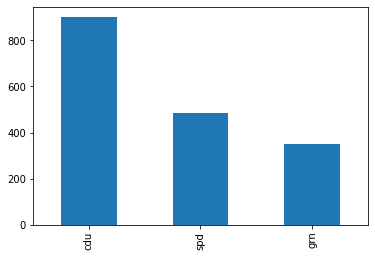

In [832]:
df_s.label.value_counts().plot(kind='bar')

In [834]:
df_s['sentence2']=df_s.sentece.apply(cleaning)

In [835]:
df_s['sentence2']= df_s['sentence2'].apply(common)

In [836]:
#since it is forgotton rearrenging of index, we reset the index, drop the another one
df_s.reset_index(inplace=True)
df_s.drop('index', axis=1, inplace=True)
df_s

,sentece,label,sentence2
0,Pressemitteilung Am 1,cdu,
1,September 2018 marschierte der Thüringer AfD ...,cdu,September marschierte Thüringer AfD Chef Björn...
2,Anlass war ein „,cdu,Anlass
3,Ich würde AfD und Linke,cdu,AfD
4,"Pressemitteilung Paul Ziemiak, Generalsekretär...",cdu,Paul Ziemiak Generalsekretär Deutschlands Mitg...
...,...,...,...
1732,Nur wenige Wochen nach einer Entscheidung des ...,grn,wenige Wochen Entscheidung EuGH geht nächste w...
1733,In diesem Jahr steht der Tag der Arbeit ganz i...,grn,Jahr steht Tag Arbeit ganz Zeichen Solidarität
1734,Weltweit missbrauchen Regime die derzeitige Co...,grn,Weltweit missbrauchen Regime derzeitige Freibr...
1735,Herausforderungen wie die Klimakrise und das A...,grn,Herausforderungen Klimakrise Artensterben gesc...


In [837]:
df_s.drop(list(df_s[df_s.sentence2==""].index), inplace=True)

In [838]:
df_s

,sentece,label,sentence2
1,September 2018 marschierte der Thüringer AfD ...,cdu,September marschierte Thüringer AfD Chef Björn...
2,Anlass war ein „,cdu,Anlass
3,Ich würde AfD und Linke,cdu,AfD
4,"Pressemitteilung Paul Ziemiak, Generalsekretär...",cdu,Paul Ziemiak Generalsekretär Deutschlands Mitg...
5,Pressemitteilung Anlässlich des Tages der Deut...,cdu,Anlässlich Tages Deutschen Einheit
...,...,...,...
1732,Nur wenige Wochen nach einer Entscheidung des ...,grn,wenige Wochen Entscheidung EuGH geht nächste w...
1733,In diesem Jahr steht der Tag der Arbeit ganz i...,grn,Jahr steht Tag Arbeit ganz Zeichen Solidarität
1734,Weltweit missbrauchen Regime die derzeitige Co...,grn,Weltweit missbrauchen Regime derzeitige Freibr...
1735,Herausforderungen wie die Klimakrise und das A...,grn,Herausforderungen Klimakrise Artensterben gesc...


In [839]:
X = df_s['sentence2']
y = df_s['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [840]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [841]:
X_train_count = vectorizer.transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [842]:
model_sent = LogisticRegression()
model_sent.fit(X_train_count, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [843]:
y_pred = model_sent.predict(X_test_count)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[187   1   0]
 [ 21  33   2]
 [  1   0  97]]
              precision    recall  f1-score   support

         cdu       0.89      0.99      0.94       188
         grn       0.97      0.59      0.73        56
         spd       0.98      0.99      0.98        98

    accuracy                           0.93       342
   macro avg       0.95      0.86      0.89       342
weighted avg       0.93      0.93      0.92       342



### visualizing for sentences

In [844]:
original = ""
for i in df_s[df_s['label']=='cdu'].sentence2:
    a = "".join(i)
    original += a

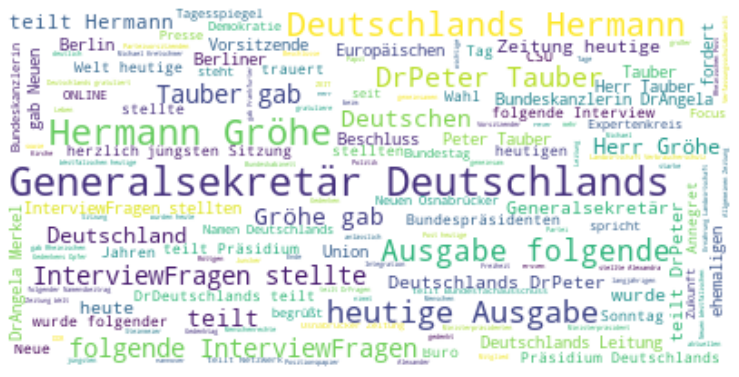

In [845]:
wordcloud = WordCloud(background_color="white", max_words=1000)
wordcloud.generate(original)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

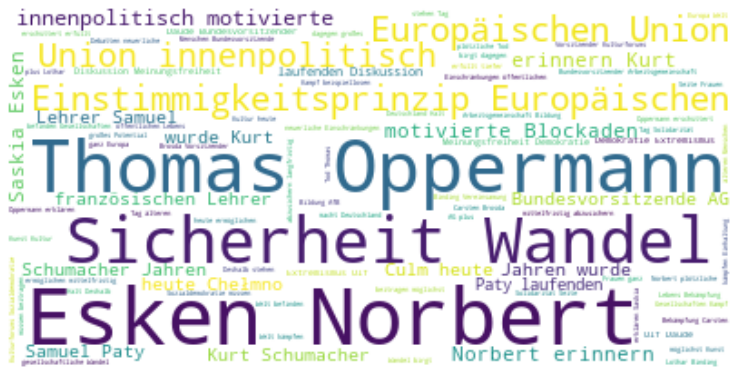

In [846]:
original = ""
for i in df_s[df_s['label']=='spd'].sentence2:
    a = "".join(i)
    original += a
wordcloud = WordCloud(background_color="white", max_words=1000)
wordcloud.generate(original)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

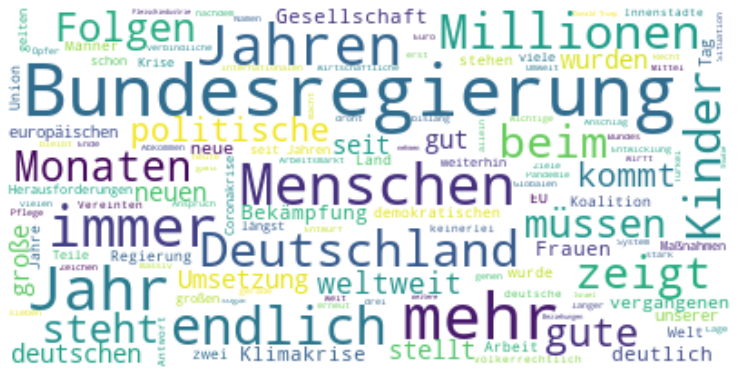

In [847]:
original = ""
for i in df_s[df_s['label']=='grn'].sentence2:
    a = "".join(i)
    original += a
wordcloud = WordCloud(background_color="white", max_words=1000)
wordcloud.generate(original)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
#we were able to get data all texts for spd and cdu, 
#thts why we want to continue work both them, 
#we got the data at the beginning. 

In [848]:
label_c = ('cdu '*len(cdu)).split()
cdu['label'] = label_c
cdu

,text,label
0,Am 1. September 2018 marschierte der Thüringer...,cdu
1,"Herr Ziemiak, halten Sie die Linke in Thüringe...",cdu
2,Der Terror von Halle will nicht in unsere Köpf...,cdu
3,Anlässlich des Tages der Deutschen Einheit am ...,cdu
4,Anlässlich der gestrigen Sitzung des Klimakabi...,cdu
...,...,...
464,Der Stellvertretende Vorsitzende der CDU Deuts...,cdu
465,Im Rahmen seines Besuchs beim Wahlkampfauftakt...,cdu
466,Anlässlich des Holocaust-Gedenktags erklärt de...,cdu
467,"Führende Vertreter der Linken beklagen, dass s...",cdu


In [849]:
label_s = ('spd '*len(spd)).split()
spd['label'] = label_s
spd

,text,label
0,Die SPD-Vorsitzenden Saskia Esken und Norbert ...,spd
1,"„Es ist zu begrüßen, dass es nun nicht in weni...",spd
2,Zum Ende der deutschen EU-Ratspräsidentschaft ...,spd
3,Für die Medien- und Netzpolitische Kommission ...,spd
4,"""Die Blockade des EU-Haushalts durch Polen und...",spd
...,...,...
476,Der SPD-Vorsitzende und Kanzlerkandidat Martin...,spd
477,Am 25. Juni 2017 findet der außerordentliche B...,spd
478,Zur Ratifizierung der Istanbul-Konvention am 1...,spd
479,Der SPD-Vorsitzende und Kanzlerkandidat Martin...,spd


In [850]:
frame = [cdu, spd]
df_two = pd.concat(frame)
df_two

,text,label
0,Am 1. September 2018 marschierte der Thüringer...,cdu
1,"Herr Ziemiak, halten Sie die Linke in Thüringe...",cdu
2,Der Terror von Halle will nicht in unsere Köpf...,cdu
3,Anlässlich des Tages der Deutschen Einheit am ...,cdu
4,Anlässlich der gestrigen Sitzung des Klimakabi...,cdu
...,...,...
476,Der SPD-Vorsitzende und Kanzlerkandidat Martin...,spd
477,Am 25. Juni 2017 findet der außerordentliche B...,spd
478,Zur Ratifizierung der Istanbul-Konvention am 1...,spd
479,Der SPD-Vorsitzende und Kanzlerkandidat Martin...,spd


In [851]:
df_two.reset_index(inplace=True)
df_two.drop('index', axis=1, inplace=True)
df_two

,text,label
0,Am 1. September 2018 marschierte der Thüringer...,cdu
1,"Herr Ziemiak, halten Sie die Linke in Thüringe...",cdu
2,Der Terror von Halle will nicht in unsere Köpf...,cdu
3,Anlässlich des Tages der Deutschen Einheit am ...,cdu
4,Anlässlich der gestrigen Sitzung des Klimakabi...,cdu
...,...,...
945,Der SPD-Vorsitzende und Kanzlerkandidat Martin...,spd
946,Am 25. Juni 2017 findet der außerordentliche B...,spd
947,Zur Ratifizierung der Istanbul-Konvention am 1...,spd
948,Der SPD-Vorsitzende und Kanzlerkandidat Martin...,spd


<AxesSubplot:>

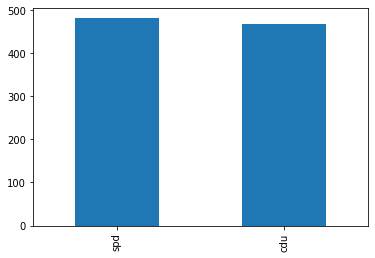

In [852]:
df_two.label.value_counts().plot(kind='bar')

In [858]:
df_two[df_two['label']=='spd']['text'][469]

'Die SPD-Vorsitzenden Saskia Esken und Norbert Walter-Borjans laden im Anschluss an die Sitzung des Präsidiums zu einer Pressekonferenz über aktuelle Themen ein.\nDie Pressekonferenz findet statt\nam Montag, 18. Januar 2021,\num 11:45 Uhr,\nONLINE.\nAufgrund der weiterhin geltenden Kontaktbeschränkungen findet die Pressekonferenz als Videoschalte statt. Sie haben die Möglichkeit via Chat oder Video Fragen zu stellen. Sie können sich ab 11:30 Uhr unter dem folgenden Link in die Videoschalte einwählen: https://tinyurl.com/spdpresse180121\nEine spezielle Software ist nicht notwendig.\nWenn Sie die Pressekonferenz nur hören möchten, können Sie sich alternativ auch per Telefon dazu schalten. Dazu wählen Sie bitte die Rufnummer 030/25993993 und geben den Code 994 240 724 an.\nSollten Sie technische Fragen oder Probleme haben, wenden Sie sich gerne im Vorfeld an die Pressestelle (pressestelle@spd.de oder 030/25991300).\nIm Anschluss an die virtuelle Pressekonferenz besteht ab ca. 12:15 Uhr di

In [854]:
#since there were some https links in the text we had problems to execute some codes
df_two['text2']=df_two.text.apply(cleaning)
df_two['text2']= df_two['text2'].apply(common)

TypeError: expected string or bytes-like object

In [863]:
#chaning links to strings
df_two.text=df_two.text.apply(lambda x: str(x))

In [865]:
#eliminating url links
def url(data):
    ret = []
    a = data.split('.')
    for i in a:
        if 'https:' not in i:
             ret.append(i)
    return " ".join(ret)

In [864]:
df_two[df_two.text.str.contains('https:')]

,text,label
253,Die CDU-Kommission „Nachhaltiges Leben – Leben...,cdu
469,Die SPD-Vorsitzenden Saskia Esken und Norbert ...,spd
476,Das erste digitale Debattencamp der SPD ist de...,spd
480,Die SPD-Vorsitzenden Saskia Esken und Norbert ...,spd
483,Der diesjährige Regine-Hildebrandt-Preis 2020 ...,spd
490,Die SPD-Vorsitzenden Saskia Esken und Norbert ...,spd
493,Der diesjährige Regine-Hildebrandt-Preis 2020 ...,spd
499,Das Bedürfnis nach Sicherheit ist bei allen Me...,spd
505,Im Anschluss an die Sitzung des SPD-Parteivors...,spd
518,"Liebe Kolleginnen und Kollegen,\ndie SPD lädt ...",spd


In [867]:
df_two['tt'] = df_two.text.apply(url)

In [869]:
df_two['tt']

0      Am 1  September 2018 marschierte der Thüringer...
1      Herr Ziemiak, halten Sie die Linke in Thüringe...
2      Der Terror von Halle will nicht in unsere Köpf...
3      Anlässlich des Tages der Deutschen Einheit am ...
4      Anlässlich der gestrigen Sitzung des Klimakabi...
                             ...                        
945    Der SPD-Vorsitzende und Kanzlerkandidat Martin...
946    Am 25  Juni 2017 findet der außerordentliche B...
947    Zur Ratifizierung der Istanbul-Konvention am 1...
948    Der SPD-Vorsitzende und Kanzlerkandidat Martin...
949    Der SPD-Kanzlerkandidat und SPD-Vorsitzende Ma...
Name: tt, Length: 950, dtype: object

In [868]:
df_two[df_two.tt.str.contains('https:')]

,text,label,tt


In [889]:
df_two['text2']=df_two.tt.apply(cleaning)
df_two['text2']= df_two['text2'].apply(common)

In [890]:
df_two

,text,label,tt,text2
0,Am 1. September 2018 marschierte der Thüringer...,cdu,Am 1 September 2018 marschierte der Thüringer...,September marschierte Thüringer AfD Chef Björn...
1,"Herr Ziemiak, halten Sie die Linke in Thüringe...",cdu,"Herr Ziemiak, halten Sie die Linke in Thüringe...",Herr Ziemiak halten Thüringen Ministerpräsiden...
2,Der Terror von Halle will nicht in unsere Köpf...,cdu,Der Terror von Halle will nicht in unsere Köpf...,Terror Halle Köpfe kaum begreiflich Widerspric...
3,Anlässlich des Tages der Deutschen Einheit am ...,cdu,Anlässlich des Tages der Deutschen Einheit am ...,Anlässlich Tages Deutschen Einheit Oktober Vor...
4,Anlässlich der gestrigen Sitzung des Klimakabi...,cdu,Anlässlich der gestrigen Sitzung des Klimakabi...,Anlässlich gestrigen Sitzung Klimakabinetts Vo...
...,...,...,...,...
945,Der SPD-Vorsitzende und Kanzlerkandidat Martin...,spd,Der SPD-Vorsitzende und Kanzlerkandidat Martin...,Kanzlerkandidat Martin Schulz stellt Buch Frei...
946,Am 25. Juni 2017 findet der außerordentliche B...,spd,Am 25 Juni 2017 findet der außerordentliche B...,Juni findet außerordentliche Bundesparteitag D...
947,Zur Ratifizierung der Istanbul-Konvention am 1...,spd,Zur Ratifizierung der Istanbul-Konvention am 1...,Ratifizierung Juni Bundesvorsitzende Arbeitsge...
948,Der SPD-Vorsitzende und Kanzlerkandidat Martin...,spd,Der SPD-Vorsitzende und Kanzlerkandidat Martin...,Kanzlerkandidat Martin Schulz Boris Pistorius ...


In [891]:
#intro words may mislead our model, thefore it is better to drop them
def wth_intro(x):
    a = x.split()
    a = a[10:]
    return " ".join(a)

In [892]:
df_two['text2'] = df_two.text2.apply(wth_intro)

In [893]:
X = df_two['text2']
y = df_two['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [894]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [895]:
X_train_count = vectorizer.transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [896]:

model_two = LogisticRegression()
model_two.fit(X_train_count, y_train)


log_count_acc = cross_val_score(model_two, X_test_count, y_test,cv = 10).mean()
print(log_count_acc)

0.8684210526315791


In [897]:
y_pred = model_two.predict(X_test_count)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[91  1]
 [ 5 93]]
              precision    recall  f1-score   support

         cdu       0.95      0.99      0.97        92
         spd       0.99      0.95      0.97        98

    accuracy                           0.97       190
   macro avg       0.97      0.97      0.97       190
weighted avg       0.97      0.97      0.97       190



In [902]:
#making dataframe for senteces from textes
cdu_li=[]
for i in df_two[df_two['label']=='cdu']['text']:
    a = i.split('.')
    for j in a[1:]:
        cdu_li.append(j)
label_c = ('cdu '*len(cdu_li)).split()
df_c_s=pd.DataFrame(zip(cdu_li, label_c),columns=['sentece','label'])
df_c_s

,sentece,label
0,September 2018 marschierte der Thüringer AfD ...,cdu
1,Anlass war ein „Trauermarsch“ für den in Chem...,cdu
2,Damit gingen erstmals in der deutschen Nachkr...,cdu
3,Björn Höcke trug zu diesem Anlass am Revers e...,cdu
4,Damit stellt er sich bewusst in die Tradition...,cdu
...,...,...
15066,"„Wir wollen, dass sie auch in Zukunft ihren B...",cdu
15067,Als drängende Projekte nannte er den Ausbau v...,cdu
15068,„Der Ausbau der Erneuerbaren Energien ist ein...,cdu
15069,\nBeim Besuch verschiedener Ausstellerstände z...,cdu


In [903]:
spd_li=[]
for i in df_two[df_two['label']=='spd']['text']:
    a = i.split('.')
    for j in a[1:]:
        spd_li.append(j)
label_s = ('spd '*len(spd_li)).split()
df_s_s=pd.DataFrame(zip(spd_li, label_s),columns=['sentece','label'])
df_s_s

,sentece,label
0,"\nDie Pressekonferenz findet statt\nam Montag, 18",spd
1,"Januar 2021,\num 11:45 Uhr,\nONLINE",spd
2,\nAufgrund der weiterhin geltenden Kontaktbesc...,spd
3,Sie haben die Möglichkeit via Chat oder Video...,spd
4,Sie können sich ab 11:30 Uhr unter dem folgen...,spd
...,...,...
7705,"de, Tel",spd
7706,: 030887144713,spd
7707,\nFür Fragen zum Termin stehen wir Ihnen gerne...,spd
7708,\nÜber Ihr Interesse freuen wir uns,spd


In [904]:
frame =[df_c_s, df_s_s]
df_two_s = pd.concat(frame)
df_two_s

,sentece,label
0,September 2018 marschierte der Thüringer AfD ...,cdu
1,Anlass war ein „Trauermarsch“ für den in Chem...,cdu
2,Damit gingen erstmals in der deutschen Nachkr...,cdu
3,Björn Höcke trug zu diesem Anlass am Revers e...,cdu
4,Damit stellt er sich bewusst in die Tradition...,cdu
...,...,...
7705,"de, Tel",spd
7706,: 030887144713,spd
7707,\nFür Fragen zum Termin stehen wir Ihnen gerne...,spd
7708,\nÜber Ihr Interesse freuen wir uns,spd


In [905]:
df_two_s['tt'] = df_two_s.sentece.apply(url)
df_two_s['sentence2']=df_two_s.tt.apply(cleaning)
df_two_s['sentence2']= df_two_s['sentence2'].apply(common)

In [907]:
#since it is forgotton rearrenging of index, we reset the index, drop the another one
df_two_s.reset_index(inplace=True)
df_two_s.drop('index', axis=1, inplace=True)
df_two_s

,sentece,label,tt,sentence2
0,September 2018 marschierte der Thüringer AfD ...,cdu,September 2018 marschierte der Thüringer AfD ...,September marschierte Thüringer AfD Chef Björn...
1,Anlass war ein „Trauermarsch“ für den in Chem...,cdu,Anlass war ein „Trauermarsch“ für den in Chem...,Anlass Trauermarsch Chemnitz Asylbewerber erst...
2,Damit gingen erstmals in der deutschen Nachkr...,cdu,Damit gingen erstmals in der deutschen Nachkr...,gingen erstmals deutschen Nachkriegsgeschichte...
3,Björn Höcke trug zu diesem Anlass am Revers e...,cdu,Björn Höcke trug zu diesem Anlass am Revers e...,Björn Höcke trug Anlass Revers weiße Rose
4,Damit stellt er sich bewusst in die Tradition...,cdu,Damit stellt er sich bewusst in die Tradition...,stellt bewusst Traditionslinie Widerstandsgrup...
...,...,...,...,...
22776,"de, Tel",spd,"de, Tel",de Tel
22777,: 030887144713,spd,: 030887144713,
22778,\nFür Fragen zum Termin stehen wir Ihnen gerne...,spd,\nFür Fragen zum Termin stehen wir Ihnen gerne...,Fragen Termin stehen gerne Verfügung
22779,\nÜber Ihr Interesse freuen wir uns,spd,\nÜber Ihr Interesse freuen wir uns,Interesse freuen


In [909]:
#dropping "" values from the dateframe
df_two_s.drop(list(df_s[df_s.sentence2==""].index), inplace=True)

<AxesSubplot:>

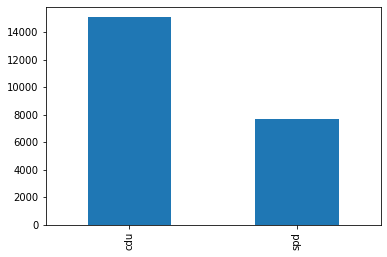

In [910]:
df_two_s.label.value_counts().plot(kind='bar')

In [912]:
X = df_two_s['sentence2']
y = df_two_s['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [913]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [914]:
X_train_count = vectorizer.transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [917]:
model_two_sent = LogisticRegression()
model_two_sent.fit(X_train_count, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [918]:
y_pred = model_two_sent.predict(X_test_count)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[2855  173]
 [ 586  943]]
              precision    recall  f1-score   support

         cdu       0.83      0.94      0.88      3028
         spd       0.84      0.62      0.71      1529

    accuracy                           0.83      4557
   macro avg       0.84      0.78      0.80      4557
weighted avg       0.83      0.83      0.83      4557



In [957]:
model_two_sent = RandomForestClassifier()
model_two_sent.fit(X_train_count, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [958]:
y_pred = model_two_sent.predict(X_test_count)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[2839  189]
 [ 651  878]]
              precision    recall  f1-score   support

         cdu       0.81      0.94      0.87      3028
         spd       0.82      0.57      0.68      1529

    accuracy                           0.82      4557
   macro avg       0.82      0.76      0.77      4557
weighted avg       0.82      0.82      0.81      4557

